# Police Killings in the U.S. Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
police_killings = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")

## Exploring the dataset

In [2]:
# Whats the shape of the dataset?
police_killings.shape

(467, 34)

In [3]:
# Have look at the columns
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year', 'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white', 'share_black', 'share_hispanic', 'p_income', 'h_income', 'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov', 'urate', 'college'], dtype='object')

In [4]:
# Check head and tail of the dataset
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [5]:
police_killings.tail()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418,46166,0.593900,1,1,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608,40368,0.882085,1,2,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200,42017,0.909156,2,2,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052,72112,0.874362,2,4,23.9,0.069601,0.396476
466,Zaki Shinwary,48,Male,Unknown,January,16,2015,Lake Arrowhead Ave and Great Salt Lake Dr,Fremont,CA,...,12.3,33590,88940,72112,1.233359,4,5,6.1,0.080912,0.435773


In [6]:
# Lets see the unique values in the dataset features.
for column in police_killings.columns:
    print(column, police_killings[column].unique().size)

name 465
age 61
gender 2
raceethnicity 6
month 6
day 31
year 1
streetaddress 460
city 364
state 47
latitude 462
longitude 462
state_fp 47
county_fp 113
tract_ce 389
geo_id 458
county_id 300
namelsad 389
lawenforcementagency 377
cause 5
armed 8
pop 445
share_white 363
share_black 246
share_hispanic 293
p_income 452
h_income 455
county_income 299
comp_income 457
county_bucket 6
nat_bucket 6
pov 281
urate 457
college 456


### Initial analysis

1. 465 unique names : is there any noise in the dataset? Same person was killed many times? or are there some names same of the civilian?

2. 61 unique ages : What age group was most affected by the killings.

3. 6 races were involved.

4. Killings took place in 6 unique months.

5. 460 unique street address, that means on some streets there where more killings are not the safest of all.

6. 364 cities in which killings took place.

7. Out of 50 states in the U.S., 47 had the cases of police killings.

8. Which gender was killed the most?

9. There were 5 causes of death.

10. The deceased were armed in 8 different ways.

11. Were the killings took place in densely populated area?

In [7]:
police_killings["raceethnicity"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

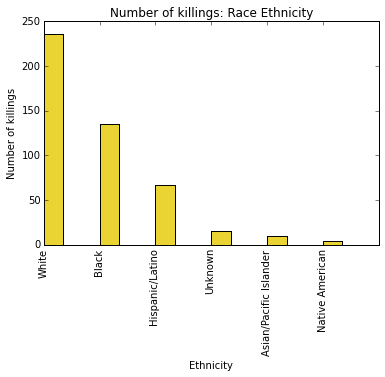

In [8]:
N = 6
index = np.arange(N)
width = 0.35
fig, ax = plt.subplots()
ax.bar(index, police_killings["raceethnicity"].value_counts(), width, color = "#ead433")
ax.set_ylabel("Number of killings")
ax.set_xlabel("Ethnicity")
ax.set_title("Number of killings: Race Ethnicity")
ax.set_xticklabels(["White","Black","Hispanic/Latino","Unknown","Asian/Pacific Islander","Native American"], rotation = 90)
plt.show()



It seems that most people killed were white, 236.

### Data Cleaning

In [9]:
income = pd.Series()
income = police_killings[police_killings["p_income"] != '-']["p_income"].astype(int)


## Histogram

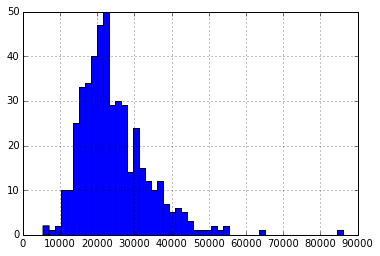

In [10]:
income.hist(bins = 50)

In [11]:
income.median()

22348.0

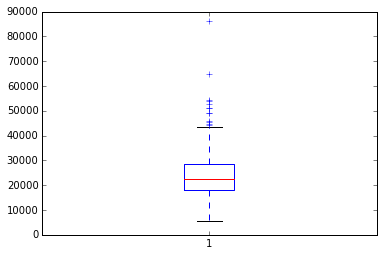

In [12]:
plt.boxplot(income)
plt.show()

There are so many outliers which are affecting the mean of the sample.

Most of the killings took place in the middle class income 

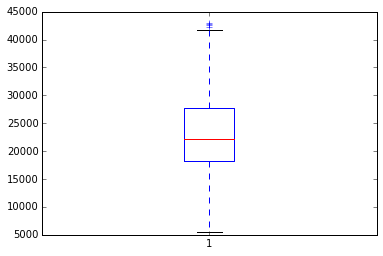

23387.671111111111

In [13]:
income_rm_outliers = income[income<43000]
plt.boxplot(income_rm_outliers)
plt.show()
income_rm_outliers.mean()


### Shooting by state

In [14]:
# Get more data to verify and come to a better conclusion.

state_pop = pd.read_csv('state_population.csv')
counts = police_killings["state_fp"].value_counts()


In [15]:
states = pd.DataFrame({"STATE": counts.index, "shooting": counts})
states = state_pop.merge(states, on = "STATE")
states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shooting
0,40,3,6,1,Alabama,4858979,3755483,77.3,8
1,40,4,9,2,Alaska,738432,552166,74.8,2
2,40,4,8,4,Arizona,6828065,5205215,76.2,25
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4
4,40,4,9,6,California,39144818,30023902,76.7,74


In [16]:
states["pop_millions"] = states["POPESTIMATE2015"] /1000000
states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shooting,pop_millions
0,40,3,6,1,Alabama,4858979,3755483,77.3,8,4.858979
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4,2.978204
4,40,4,9,6,California,39144818,30023902,76.7,74,39.144818


In [17]:
# States with most number of shooting
states.sort(['shooting'] , ascending = False).head()[["NAME","shooting"]]

,NAME,shooting
4,California,74
40,Texas,47
9,Florida,29
2,Arizona,25
35,Oklahoma,22


In [18]:
# States with least number of shooting
states.sort(['shooting'] , ascending = True).head()[["NAME","shooting"]]

,NAME,shooting
46,Wyoming,1
19,Maine,1
8,District of Columbia,1
6,Connecticut,1
29,New Hampshire,1


In [19]:
# Rate of killings

states["rate"] = states["shooting"]/states["pop_millions"]
states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shooting,pop_millions,rate
0,40,3,6,1,Alabama,4858979,3755483,77.3,8,4.858979,1.646436
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4,2.978204,1.343091
4,40,4,9,6,California,39144818,30023902,76.7,74,39.144818,1.890416


In [20]:
# States with highest rate of shooting
states.sort(['rate'] , ascending = False).head(10)[["NAME","rate"]]

,NAME,rate
35,Oklahoma,5.624674
2,Arizona,3.661359
27,Nebraska,3.164240
11,Hawaii,2.794071
1,Alaska,2.708442
12,Idaho,2.417021
31,New Mexico,2.397956
18,Louisiana,2.355095
5,Colorado,2.199182
7,Delaware,2.114312


It appears that Oklahoma has the highest rate of shooting by police. 5.63 per million.

In [21]:
states.sort(['rate'] , ascending = True).head(10)[["NAME","rate"]]

,NAME,rate
6,Connecticut,0.278483
37,Pennsylvania,0.546768
15,Iowa,0.640226
32,New York,0.656705
21,Massachusetts,0.735898
29,New Hampshire,0.751536
19,Maine,0.752260
13,Illinois,0.855366
34,Ohio,0.861073
45,Wisconsin,0.866350


And Connecticut appears to be the state with least police killing rates

### State by state differences

Why do some states have a much higher rate of police killings than others? Is it due to random chance, or is there an underlying factor that could explain it?

In [23]:
state_highest = ["OK", "AZ","NE","HI","AK","ID","NM","LA","CO","DE"]
state_lowest = ["CT","PA","IA","NY","MA","NH","ME","IL","OH","WI"]

In [30]:
pk_sh = police_killings[police_killings["state"].isin(state_highest)]
pk_sl = police_killings[police_killings["state"].isin(state_lowest)]

In [32]:
pk_sh[["pop","h_income"]].describe()

,pop,h_income
count,93.000000,92.000000
mean,4269.344086,43327.152174
std,2100.699519,17537.586163
min,0.000000,15293.000000
25%,2868.000000,32509.250000
50%,4232.000000,39825.500000
75%,5375.000000,53574.750000
max,13561.000000,111464.000000
